In [20]:
from process_image import *
from model_nn import *

In [21]:
input_directory = "../Dataset/Foto_Resize_Rotate_50x50" 
X_train, y_train, X_test, y_test, X_val, y_val, scalerinput = process_all(input_directory)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Found folders: ['Azmira', 'David', 'Dimas', 'Fadhli', 'Fadlin', 'Hafidz', 'Haidar', 'Hanna', 'Keiko', 'Khansa', 'Mikhael', 'Puti', 'Raesa', 'Satwika', 'Toni']
(968, 2500) (968, 15) (208, 2500) (208, 15) (208, 2500) (208, 15)


In [22]:
model_50 = FaceRecognitionModel(X_train.shape[1], [64], y_train.shape[1])

In [23]:
error_train, error_val = model_50.train(X_train, y_train, X_val, y_val, epochs=10000, learning_rate=1e-2, optimizer='sgd', generate_new_params=True)

Params rewritten
Epoch 0, Training Loss: 3.385e+00, Validation Loss: 3.005e+00, Patience: 0, Learning Rate: 0.01
Epoch 1, Training Loss: 3.009e+00, Validation Loss: 2.835e+00, Patience: 0, Learning Rate: 0.01
Epoch 2, Training Loss: 2.846e+00, Validation Loss: 2.796e+00, Patience: 0, Learning Rate: 0.01
Epoch 3, Training Loss: 2.795e+00, Validation Loss: 2.771e+00, Patience: 0, Learning Rate: 0.01
Epoch 4, Training Loss: 2.762e+00, Validation Loss: 2.753e+00, Patience: 0, Learning Rate: 0.01
Epoch 5, Training Loss: 2.737e+00, Validation Loss: 2.740e+00, Patience: 0, Learning Rate: 0.01
Epoch 6, Training Loss: 2.720e+00, Validation Loss: 2.730e+00, Patience: 0, Learning Rate: 0.01
Epoch 7, Training Loss: 2.706e+00, Validation Loss: 2.723e+00, Patience: 0, Learning Rate: 0.01
Epoch 8, Training Loss: 2.694e+00, Validation Loss: 2.716e+00, Patience: 0, Learning Rate: 0.01
Epoch 9, Training Loss: 2.684e+00, Validation Loss: 2.710e+00, Patience: 0, Learning Rate: 0.01
Epoch 10, Training Loss

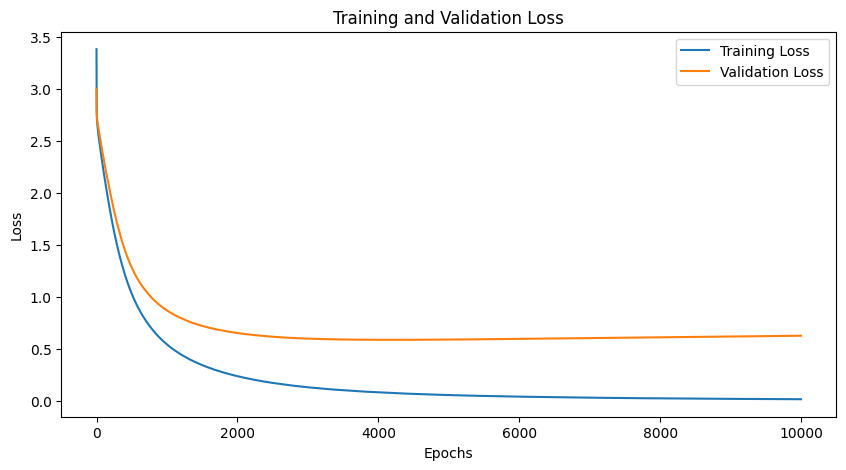

In [24]:
model_50.plot_training_error(error_train, error_val)

In [25]:
y_pred = model_50.test(X_test, y_test)
print(X_test.shape, y_test.shape, y_pred.shape)

Test Error : 0.44986086936217135
(208, 2500) (208, 15) (208, 15)


In [26]:
model_50.add_labels_from_folders(input_directory)
model_50.evaluate_metrics(X_test, y_test)

Accuracy: 0.8653846153846154
Azmira - Precision: 0.8235294117647058, Recall: 0.9333333333333333, F1 Score: 0.8749999999999999
David - Precision: 1.0, Recall: 0.8823529411764706, F1 Score: 0.9375
Dimas - Precision: 0.8235294117647058, Recall: 1.0, F1 Score: 0.9032258064516129
Fadhli - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Fadlin - Precision: 1.0, Recall: 0.6666666666666666, F1 Score: 0.8
Hafidz - Precision: 0.8666666666666667, Recall: 0.9285714285714286, F1 Score: 0.896551724137931
Haidar - Precision: 0.46153846153846156, Recall: 0.8571428571428571, F1 Score: 0.6
Hanna - Precision: 0.7272727272727273, Recall: 0.8888888888888888, F1 Score: 0.7999999999999999
Keiko - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Khansa - Precision: 0.5, Recall: 0.2727272727272727, F1 Score: 0.3529411764705882
Mikhael - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Puti - Precision: 0.8333333333333334, Recall: 0.9375, F1 Score: 0.8823529411764706
Raesa - Precision: 0.625, Recall: 0.45454545454545453, F1 Sco

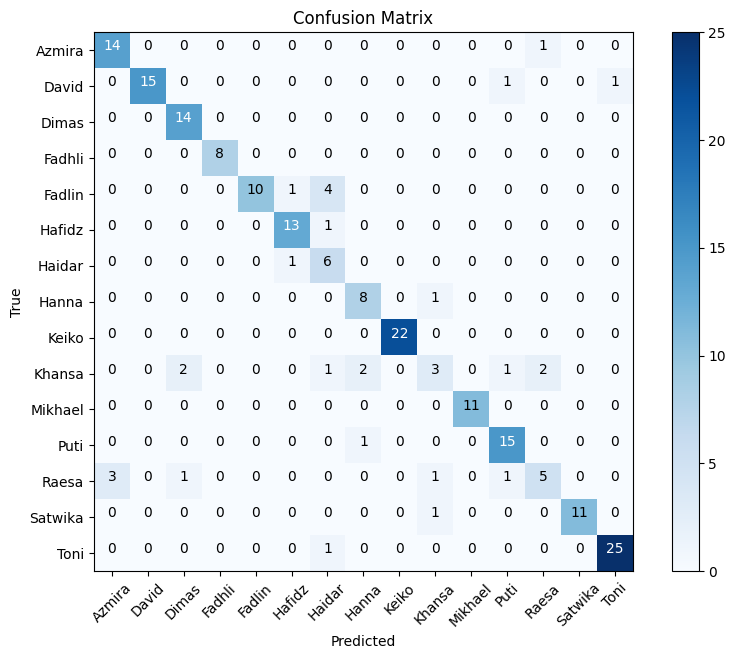

In [27]:
model_50.plot_confusion_matrix(X_test, y_test)

In [28]:
model_50.save_model("./My_Model_50/01_Yi Sang_Rotate.pkl")